                    EXPERIMENTAL DATA SUMMARY TABLE (Question 1)
Scan Rate\n(V/s) v^(1/2)\n(V/s)^(1/2) E_pa\n(V) E_pc\n(V)  i_pc\n(A) |i_pc|\n(A)
            0.02               0.1414     0.205     0.300 -6.029e-06   6.029e-06
            0.04               0.2000     0.190     0.310 -7.643e-06   7.643e-06
            0.06               0.2449     0.185     0.315 -8.687e-06   8.687e-06
            0.08               0.2828     0.175     0.325 -9.074e-06   9.074e-06
            0.10               0.3162     0.165     0.330 -9.534e-06   9.534e-06
            0.12               0.3464     0.165     0.330 -1.001e-05   1.001e-05
            0.14               0.3742     0.160     0.335 -1.016e-05   1.016e-05




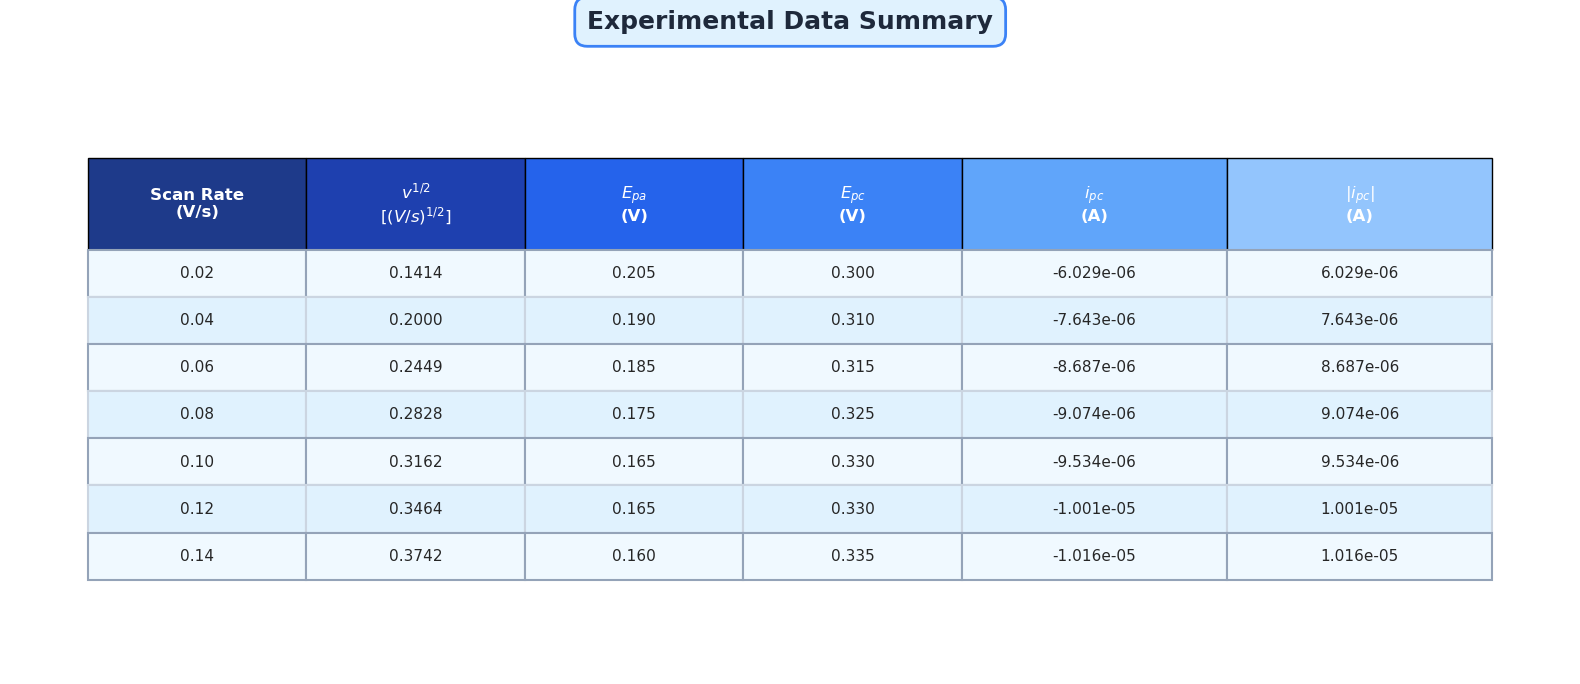

              ELECTRON TRANSFER NUMBER (n) CALCULATION (Question 3)
Peak separation ΔE_p at each scan rate (V): [0.095 0.12  0.13  0.15  0.165 0.165 0.175]
Average peak separation |ΔE_p|: 0.1429 V
Calculated apparent electron number (n): 0.4130
Note: The theoretical electron transfer number for Fe(CN)6 3-/4- system is n = 1.
The difference from 1 indicates the non-ideal nature of the experimental system.


               ELECTRODE AREA (A) CALCULATION (Question 2 & 4)
|i_pc| vs. v^(1/2) Linear Regression Results:
  Slope: 1.74e-05 A·(V/s)^(-1/2)
  Intercept: 4.00e-06 A
  R² (Coefficient of Determination): 0.958166

Constants used for area calculation:
  Randles-Sevcik Constant: 2.69e+05
  Theoretical electron number (n): 1.0
  Diffusion coefficient (D): 7.60e-06 cm²/s
  Concentration (C): 1.00e-06 mol/cm³ (1.0e-03 M)

✓ Calculated Electrode Area (A): 0.0234 cm²


Generating Modern |i_pc| vs. v^(1/2) Plot (Question 2)...


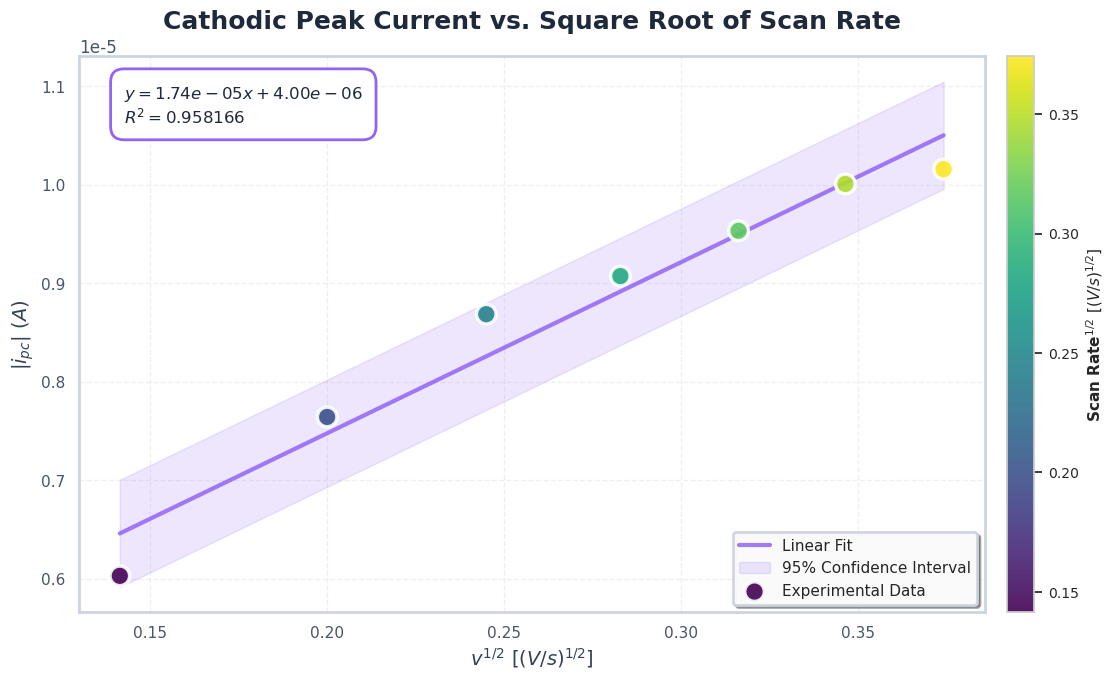


✓ All visualizations completed successfully!


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Set modern seaborn style
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.1)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# --- 1. Data Extraction and Organization ---
# Data extracted from S__*.jpg image files
# v (V/s)
scan_rates_v = np.array([0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14])

# E_pa (V) - from "Segment 1"
epa_V = np.array([0.205, 0.190, 0.185, 0.175, 0.165, 0.165, 0.160])

# E_pc (V) - from "Segment 2"
epc_V = np.array([0.300, 0.310, 0.315, 0.325, 0.330, 0.330, 0.335])

# i_pc (A) - from "Segment 2" (cathodic current)
# Note: i_pc is negative, but we usually take its absolute value for calculations
ipc_A = np.array([-6.029e-6, -7.643e-6, -8.687e-6, -9.074e-6, -9.534e-6, -1.001e-5, -1.016e-5])
ipc_abs_A = np.abs(ipc_A)

# (Scan Rate)^1/2
v_sqrt = np.sqrt(scan_rates_v)

# --- Question 1: Create Table ---
print("=" * 90)
print("                    EXPERIMENTAL DATA SUMMARY TABLE (Question 1)")
print("=" * 90)

# Create dataframe with properly formatted column names
data = {
    'Scan Rate\n(V/s)': scan_rates_v,
    'v^(1/2)\n(V/s)^(1/2)': v_sqrt,
    'E_pa\n(V)': epa_V,
    'E_pc\n(V)': epc_V,
    'i_pc\n(A)': ipc_A,
    '|i_pc|\n(A)': ipc_abs_A
}
df = pd.DataFrame(data)

# Format the dataframe for better display
df_display = df.copy()
df_display['Scan Rate\n(V/s)'] = df_display['Scan Rate\n(V/s)'].map('{:.2f}'.format)
df_display['v^(1/2)\n(V/s)^(1/2)'] = df_display['v^(1/2)\n(V/s)^(1/2)'].map('{:.4f}'.format)
df_display['E_pa\n(V)'] = df_display['E_pa\n(V)'].map('{:.3f}'.format)
df_display['E_pc\n(V)'] = df_display['E_pc\n(V)'].map('{:.3f}'.format)
df_display['i_pc\n(A)'] = df_display['i_pc\n(A)'].map('{:.3e}'.format)
df_display['|i_pc|\n(A)'] = df_display['|i_pc|\n(A)'].map('{:.3e}'.format)

print(df_display.to_string(index=False))
print("\n")

# Create a modern styled table using matplotlib with LaTeX-style rendering
fig, ax = plt.subplots(figsize=(16, 7))
ax.axis('tight')
ax.axis('off')

# Prepare table data with better formatting
table_data = []
for i in range(len(df)):
    row = [
        f'{scan_rates_v[i]:.2f}',
        f'{v_sqrt[i]:.4f}',
        f'{epa_V[i]:.3f}',
        f'{epc_V[i]:.3f}',
        f'{ipc_A[i]:.3e}',
        f'{ipc_abs_A[i]:.3e}'
    ]
    table_data.append(row)

# Column headers using matplotlib's math text rendering for subscripts/superscripts
col_labels = [
    'Scan Rate\n(V/s)',
    r'$v^{1/2}$' + '\n' + r'$[(V/s)^{1/2}]$',
    r'$E_{pa}$' + '\n(V)',
    r'$E_{pc}$' + '\n(V)',
    r'$i_{pc}$' + '\n(A)',
    r'$|i_{pc}|$' + '\n(A)'
]

table = ax.table(cellText=table_data, colLabels=col_labels, 
                cellLoc='center', loc='center',
                colWidths=[0.14, 0.14, 0.14, 0.14, 0.17, 0.17])

# Modern table styling
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 2.5)

# Gradient-style header with modern colors
header_colors = ['#1e3a8a', '#1e40af', '#2563eb', '#3b82f6', '#60a5fa', '#93c5fd']
for i in range(len(col_labels)):
    cell = table[(0, i)]
    cell.set_facecolor(header_colors[i % len(header_colors)])
    cell.set_text_props(weight='bold', color='white', fontsize=12)
    cell.set_height(0.15)

# Modern alternating row colors with subtle gradient
colors_light = ['#f0f9ff', '#e0f2fe']
for i in range(1, len(table_data) + 1):
    for j in range(len(col_labels)):
        cell = table[(i, j)]
        cell.set_facecolor(colors_light[(i-1) % 2])
        cell.set_edgecolor('#cbd5e1')
        cell.set_linewidth(1.5)
        
        # Add hover effect simulation by making edge slightly darker for odd rows
        if i % 2 == 1:
            cell.set_edgecolor('#94a3b8')

# Add title with modern styling
fig.text(0.5, 0.95, 'Experimental Data Summary', 
         ha='center', fontsize=18, fontweight='bold', 
         color='#1e293b',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#e0f2fe', edgecolor='#3b82f6', linewidth=2))

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# --- Question 3: Calculate Number of Transferred Electrons (n) ---
print("=" * 90)
print("              ELECTRON TRANSFER NUMBER (n) CALCULATION (Question 3)")
print("=" * 90)

delta_ep_V = np.abs(epa_V - epc_V)
avg_delta_ep_V = np.mean(delta_ep_V)

print(f"Peak separation ΔE_p at each scan rate (V): {np.round(delta_ep_V, 4)}")
print(f"Average peak separation |ΔE_p|: {avg_delta_ep_V:.4f} V")

n_apparent = 0.059 / avg_delta_ep_V
print(f"Calculated apparent electron number (n): {n_apparent:.4f}")
print("Note: The theoretical electron transfer number for Fe(CN)6 3-/4- system is n = 1.")
print("The difference from 1 indicates the non-ideal nature of the experimental system.")
print("\n")


# --- Question 2 & 4: Linear Regression and Electrode Area Calculation ---
print("=" * 90)
print("               ELECTRODE AREA (A) CALCULATION (Question 2 & 4)")
print("=" * 90)

# Linear regression of |i_pc| vs. (scan rate)^1/2
slope, intercept, r_value, p_value, std_err = linregress(x=v_sqrt, y=ipc_abs_A)

print(f"|i_pc| vs. v^(1/2) Linear Regression Results:")
print(f"  Slope: {slope:.2e} A·(V/s)^(-1/2)")
print(f"  Intercept: {intercept:.2e} A")
print(f"  R² (Coefficient of Determination): {r_value**2:.6f}")

# Experimental constants (from lecture)
k_rs = 2.69e5  # Randles-Sevcik constant
n = 1.0        # Theoretical electron transfer number (n=1)
D_cm2_s = 7.6e-6  # Diffusion coefficient (cm²/s)
C_mol_L = 1.0e-3  # Concentration (1.0 mM = 1.0e-3 mol/L)
C_mol_cm3 = C_mol_L / 1000.0

# Calculate electrode area
A_cm2 = slope / (k_rs * (n**1.5) * (D_cm2_s**0.5) * C_mol_cm3)

print("\nConstants used for area calculation:")
print(f"  Randles-Sevcik Constant: {k_rs:.2e}")
print(f"  Theoretical electron number (n): {n}")
print(f"  Diffusion coefficient (D): {D_cm2_s:.2e} cm²/s")
print(f"  Concentration (C): {C_mol_cm3:.2e} mol/cm³ ({C_mol_L:.1e} M)")

print(f"\n✓ Calculated Electrode Area (A): {A_cm2:.4f} cm²")
print("=" * 90)
print("\n")

# --- Modern Plot (Question 2) ---
print("Generating Modern |i_pc| vs. v^(1/2) Plot (Question 2)...")

# Create figure with modern style
fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')

# Plot linear regression line with gradient effect
y_fit = slope * v_sqrt + intercept
ax.plot(v_sqrt, y_fit, 
        color='#8b5cf6', linestyle='-', linewidth=3, 
        alpha=0.8, label='Linear Fit', zorder=1)

# Add confidence interval for the fit
residuals = ipc_abs_A - y_fit
std_residuals = np.std(residuals)
ax.fill_between(v_sqrt, y_fit - 1.96*std_residuals, y_fit + 1.96*std_residuals,
                alpha=0.15, color='#8b5cf6', label='95% Confidence Interval')

# Plot experimental data points with modern style
scatter = ax.scatter(v_sqrt, ipc_abs_A, 
                     c=v_sqrt, cmap='viridis', 
                     s=200, alpha=0.9, 
                     edgecolors='white', linewidths=2.5,
                     label='Experimental Data', zorder=3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, pad=0.02)
cbar.set_label(r'Scan Rate$^{1/2}$ $[(V/s)^{1/2}]$', fontsize=11, weight='bold')
cbar.ax.tick_params(labelsize=10)

# Styling with LaTeX-style math text
ax.set_title('Cathodic Peak Current vs. Square Root of Scan Rate', 
             fontsize=18, fontweight='bold', pad=20, color='#1e293b')
ax.set_xlabel(r'$v^{1/2}$ $[(V/s)^{1/2}]$', fontsize=14, fontweight='bold', color='#334155')
ax.set_ylabel(r'$|i_{pc}|$ $(A)$', fontsize=14, fontweight='bold', color='#334155')

# Grid styling
ax.grid(True, alpha=0.3, linestyle='--', linewidth=1)
ax.set_axisbelow(True)

# Add regression equation and R² in a modern text box
textstr = f'$y = {slope:.2e}x + {intercept:.2e}$\n$R^2 = {r_value**2:.6f}$'
props = dict(boxstyle='round,pad=0.8', facecolor='white', 
             edgecolor='#8b5cf6', linewidth=2, alpha=0.95)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, 
        fontsize=12, verticalalignment='top',
        bbox=props, fontweight='bold', color='#1e293b')

# Legend with modern style
legend = ax.legend(loc='lower right', fontsize=11, 
                   frameon=True, shadow=True, fancybox=True,
                   edgecolor='#cbd5e1', facecolor='white', framealpha=0.95)
legend.get_frame().set_linewidth(2)

# Adjust spines
for spine in ax.spines.values():
    spine.set_edgecolor('#cbd5e1')
    spine.set_linewidth(2)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=11, 
               colors='#475569', width=2, length=6)

plt.tight_layout()
plt.show()

print("\n✓ All visualizations completed successfully!")
